In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [5]:
from prophet import Prophet
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [35]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Owner\.cache\kagglehub\datasets\prasad22\healthcare-dataset\versions\2\healthcare_dataset.csv")
df = df.drop(["Name"], axis=1)
df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [51]:
# Create a new DataFrame with only the 'Name' and 'Price' columns
new_df = df[['ds', 'y']].copy()
new_df.head(5)

,ds,y
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


In [37]:
df = df.rename(columns = {"Date of Admission":"ds","Discharge Date":"y"})
df.head()

,Age,Gender,Blood Type,Medical Condition,ds,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,y,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [39]:
df['ds'] = pd.to_datetime(df["ds"])#3741
df['Admission Year Total'] = df['ds'].dt.year
# Group by 'Admission Year' and count the total number of admissions
admissions_by_year = df.groupby('Admission Year Total').size()
# The result is a pandas Series showing the total for each year
print(admissions_by_year)

Admission Year Total
2019     7387
2020    11285
2021    10931
2022    11017
2023    11026
2024     3854
dtype: int64


In [85]:
data = {
    'Admission Year': [2019, 2020, 2021, 2022, 2023, 2024],
    'Total': [7387, 11285, 10931, 11017, 11026, 3854]
}
df = pd.DataFrame(data)
df['Admission Year'] = df['Admission Year'].astype(str)
df['Admission Year'] = pd.to_datetime(df['Admission Year'], format='%Y')
df1 = df.rename(columns = {"Admission Year":"ds","Total":"y"})
print(df1)

          ds      y
0 2019-01-01   7387
1 2020-01-01  11285
2 2021-01-01  10931
3 2022-01-01  11017
4 2023-01-01  11026
5 2024-01-01   3854


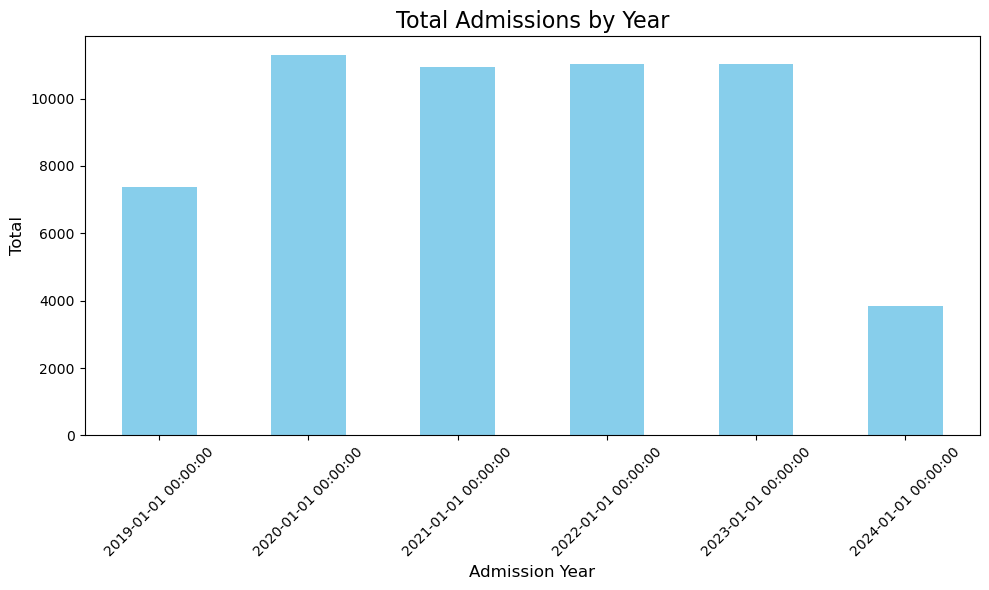

In [87]:
# Create the bar plot directly from the DataFrame
ax = df1.plot(
    kind='bar',
    x='ds',
    y='y',
    figsize=(10, 6),
    legend=False,  # Hide the legend for a single series
    color='skyblue'
)

# Set the plot title and labels
ax.set_title('Total Admissions by Year', fontsize=16)
ax.set_xlabel('Admission Year', fontsize=12)
ax.set_ylabel('Total', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust plot layout and display
plt.tight_layout()
plt.show()

In [91]:
# my_model = Prophet(interval_width=0.95)
model = Prophet(yearly_seasonality=True)
model.fit(df1)
# Create a DataFrame for future predictions (e.g., for the next 2 years)
future = model.make_future_dataframe(periods = 2, freq='Y')
print("\nFuture DataFrame:")
print(future)

# Generate the forecast
forecast = model.predict(future)

# Display the forecast, including predicted values (yhat) and uncertainty intervals
print("\nForecast for future years:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

19:21:06 - cmdstanpy - INFO - Chain [1] start processing
19:21:06 - cmdstanpy - INFO - Chain [1] done processing



Future DataFrame:
          ds
0 2019-01-01
1 2020-01-01
2 2021-01-01
3 2022-01-01
4 2023-01-01
5 2024-01-01
6 2024-12-31
7 2025-12-31

Forecast for future years:
          ds         yhat   yhat_lower    yhat_upper
3 2022-01-01  9993.549878  7061.190224  12719.538246
4 2023-01-01  8429.245094  5475.154270  11651.910155
5 2024-01-01  6850.240483  3978.215869   9993.053958
6 2024-12-31  5257.944841  2218.765254   8059.469839
7 2025-12-31  3653.786868   794.013440   6366.137709


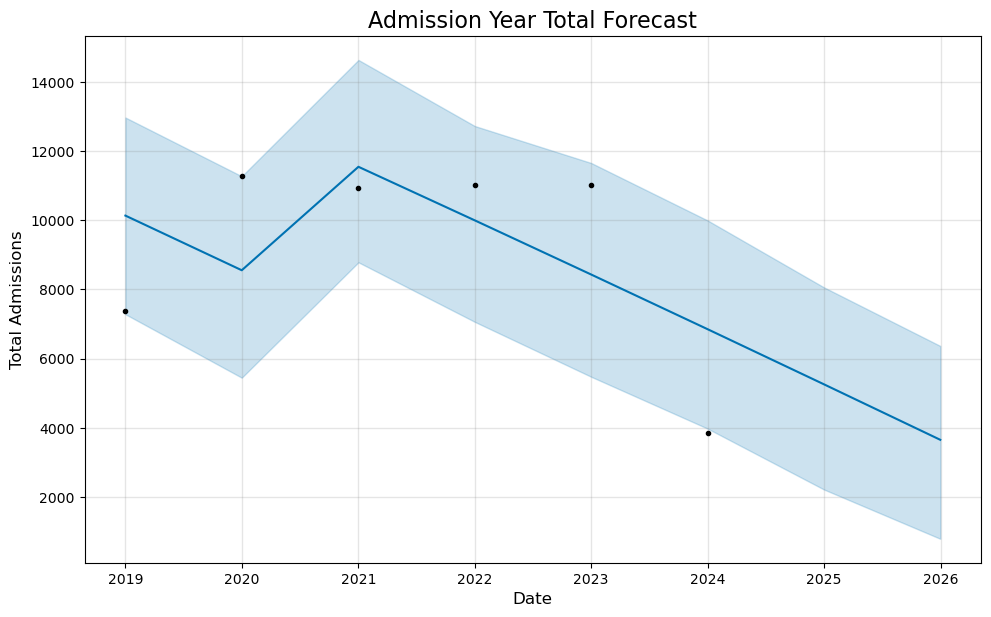

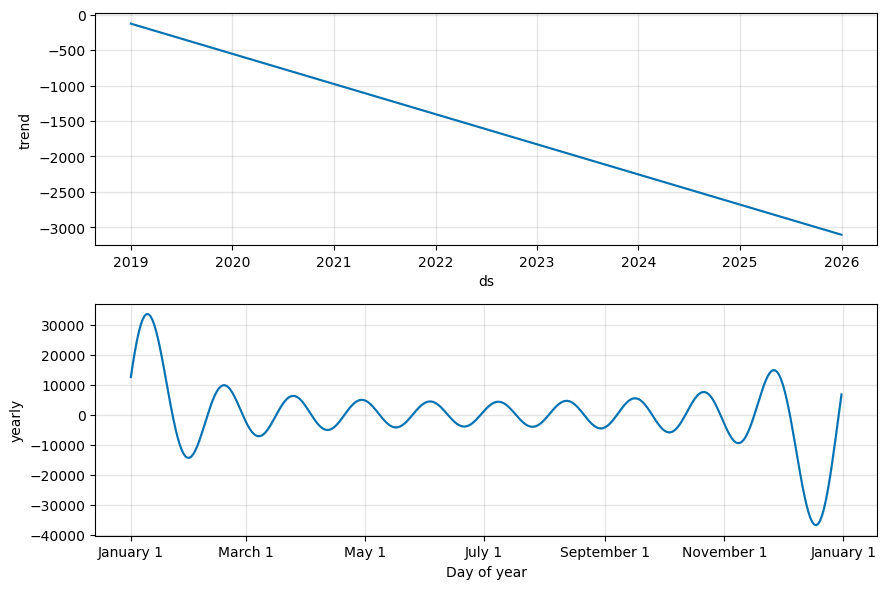

In [93]:
# Plot the forecast
fig1 = model.plot(forecast)
ax = fig1.gca()
ax.set_title("Admission Year Total Forecast", fontsize=16)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Total Admissions", fontsize=12)
plt.show()

# You can also plot the trend and seasonal components
fig2 = model.plot_components(forecast)
plt.show()

In [95]:
import os

print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Owner
